# Librerias

In [1]:
import yfinance as yf
import talib as ta
import numpy as np
import pandas as pd
from datetime import datetime
import os
#import warnings

#warnings.filterwarnings("ignore")

In [2]:
# Este código permite cambiar los gráficos a modo oscuro
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cycler

#%matplotlib qt

colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

# 1. Analisis de una acción

In [3]:
df = yf.download('AAPL') # Apple

[*********************100%%**********************]  1 of 1 completed


## 1.1. Media Movil

In [4]:
# Media móvil simple de 30 días
df["SMA fast"] = df["Close"].rolling(30).mean()
# Media móvil simple de 60 días
df["SMA slow"] = df["Close"].rolling(60).mean()

<AxesSubplot:xlabel='Date'>

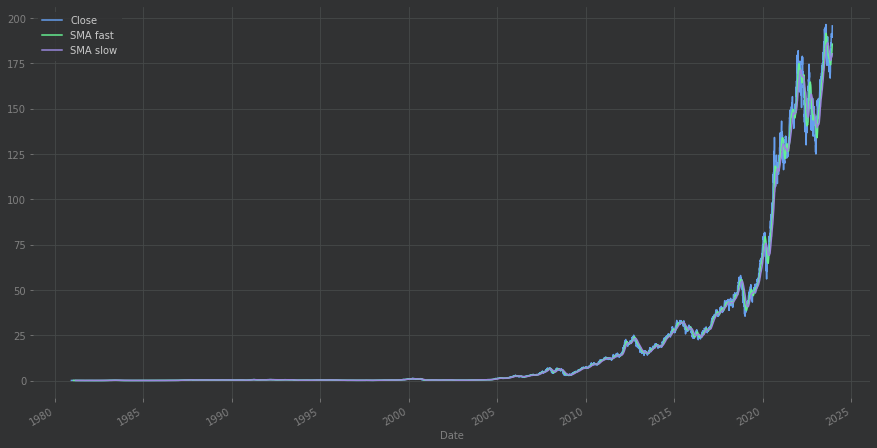

In [5]:
# Grafica
df[["Close", "SMA fast", "SMA slow"]].plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

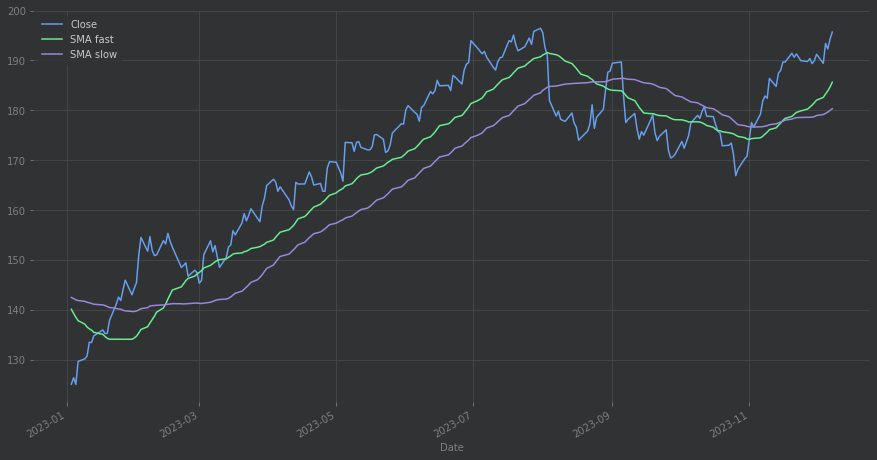

In [6]:
# Grafica en el año 2023
df[["Close", "SMA fast", "SMA slow"]].loc["2023"].plot(figsize=(15,8))

## 1.2. Estrategia

In [7]:
df["position"] = np.nan

df.loc[(df["SMA fast"] > df["SMA slow"]), "position"] = 1
df.loc[(df["SMA fast"] < df["SMA slow"]), "position"] = -1    

## 1.3. Verificación gráfica

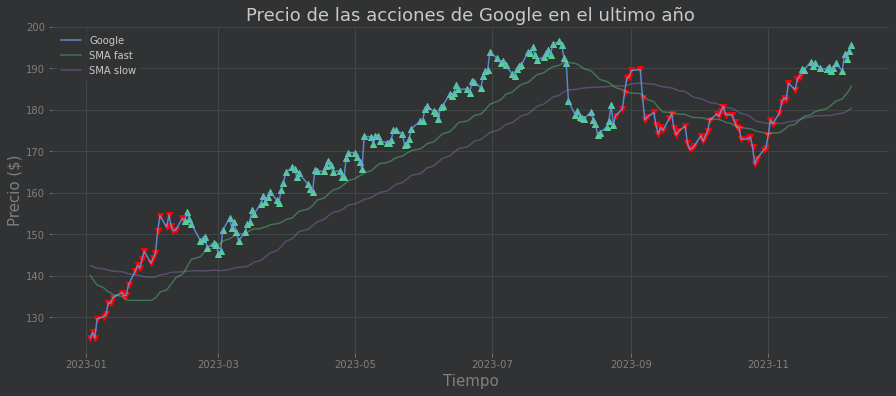

In [8]:
# Representamos toda la señal para asegurarnos de que sea correcta
year = "2023"

# Seleccionar toda la señal en una lista de índices para representar sólo estos puntos
idx_open = df.loc[df["position"] == 1].loc[year].index
idx_close = df.loc[df["position"] == -1].loc[year].index

# Adaptar el tamaño del gráfico
plt.figure(figsize=(15,6))

# Representar los puntos de la señal larga 'open' en verde y la 'sell' en rojo
plt.scatter(idx_open, df.loc[idx_open]["Close"].loc[year], color= "#57CE95", marker="^")
plt.scatter(idx_close, df.loc[idx_close]["Close"].loc[year], color= "red", marker="v")

# Representar la resistencia para asegurarse de que las condiciones se completan
plt.plot(df["Close"].loc[year].index, df["Close"].loc[year], alpha=0.8, label="Google")
plt.plot(df["Close"].loc[year].index, df["SMA fast"].loc[year], alpha=0.35, label="SMA fast")
plt.plot(df["Close"].loc[year].index, df["SMA slow"].loc[year], alpha=0.35, label="SMA slow")

# Título y nombre de los ejes 
plt.xlabel("Tiempo", size=15)
plt.ylabel("Precio ($)", size=15)
plt.title("Precio de las acciones de Google en el ultimo año", size=18)

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

## 1.4. Calculo de las ganancias

<AxesSubplot:xlabel='Date'>

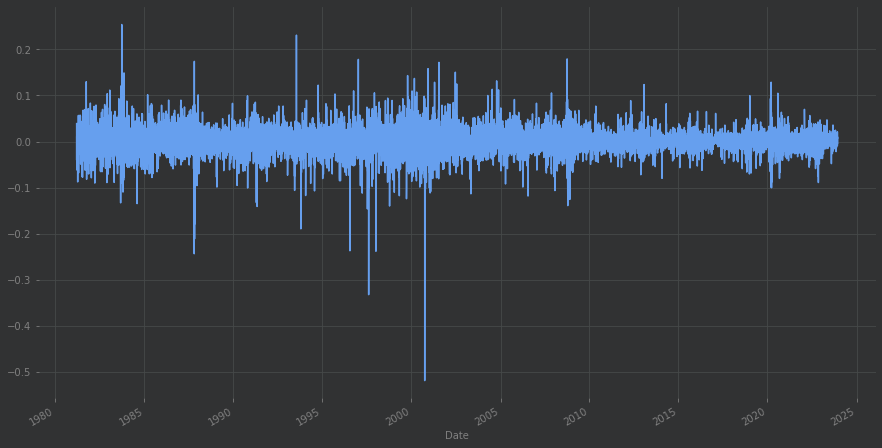

In [9]:
# Calcular el porcentaje de variación del activo
df["pct"] = df["Close"].pct_change(1)

# Calcular la rentabilidad (retorno) de la estrategia
df["return"] = df["pct"] * df["position"].shift(1)

df["return"].plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

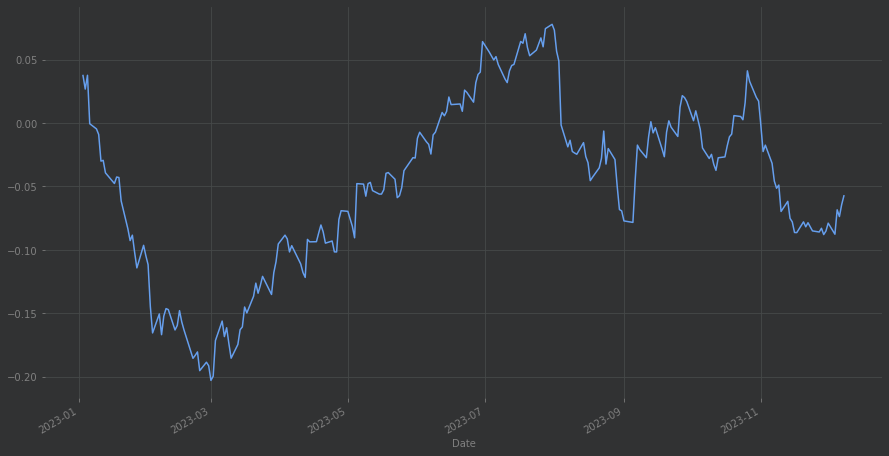

In [10]:
df['return'].loc["2023"].apply(lambda x: x+1).cumprod().apply(lambda x: x-1).plot(figsize=(15,8))

# 2. Analisis de todas las acciones

In [11]:
def preprocessing_yf(symbol):
  
    #Importar los datos
    df = yf.download(symbol).dropna()

    #Renombrar
    df.columns = ["open", "high", "low", "close", "adj close", "volume"]
    df.index.name = "time"

    # Eliminar la columna adj close
    del df["adj close"]

    return df

In [12]:
def SMA_strategy(input):

    df = preprocessing_yf(input)
    
    # Crear media móvil simple de 30 días
    df["SMA fast"] = df["close"].rolling(30).mean()
    
    # Crear media móvil simple de 60 días
    df["SMA slow"] = df["close"].rolling(60).mean()
    
    df["position"] = np.nan
    
    # Crear la condición
    df.loc[(df["SMA fast"] > df["SMA slow"]) , "position"] = 1
    df.loc[(df["SMA fast"] < df["SMA slow"]) , "position"] = -1
    
    df["pct"] = df["close"].pct_change(1)
    
    # Calcular la rentabilidad de la estrategia
    df["return"] = df["pct"] * (df["position"].shift(1))
    
    return df

In [13]:
inversiones = {
    "GOOGL": 1.39858, # Google
    "SPY": 0.29853,
    "NVDA": 0.12932,
    "CRM": 0.26758,
    "AMD": 0.45376,
    "NDAQ": 1,
    "MSFT": 0.11967, # Microsoft
    "WMT": 0.24625,
    "TSLA": 0.15422,
    "VOO": 0.0823,
    "AMZN": 0.21293,
    "NOW": 0.04072,
    "AAPL": 0.11257, # Apple
    "FSLR": 0.10157,
    "EQT": 0.31075 
}

In [14]:
empresas = list(inversiones.keys())
acciones = np.array(list(inversiones.values()))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

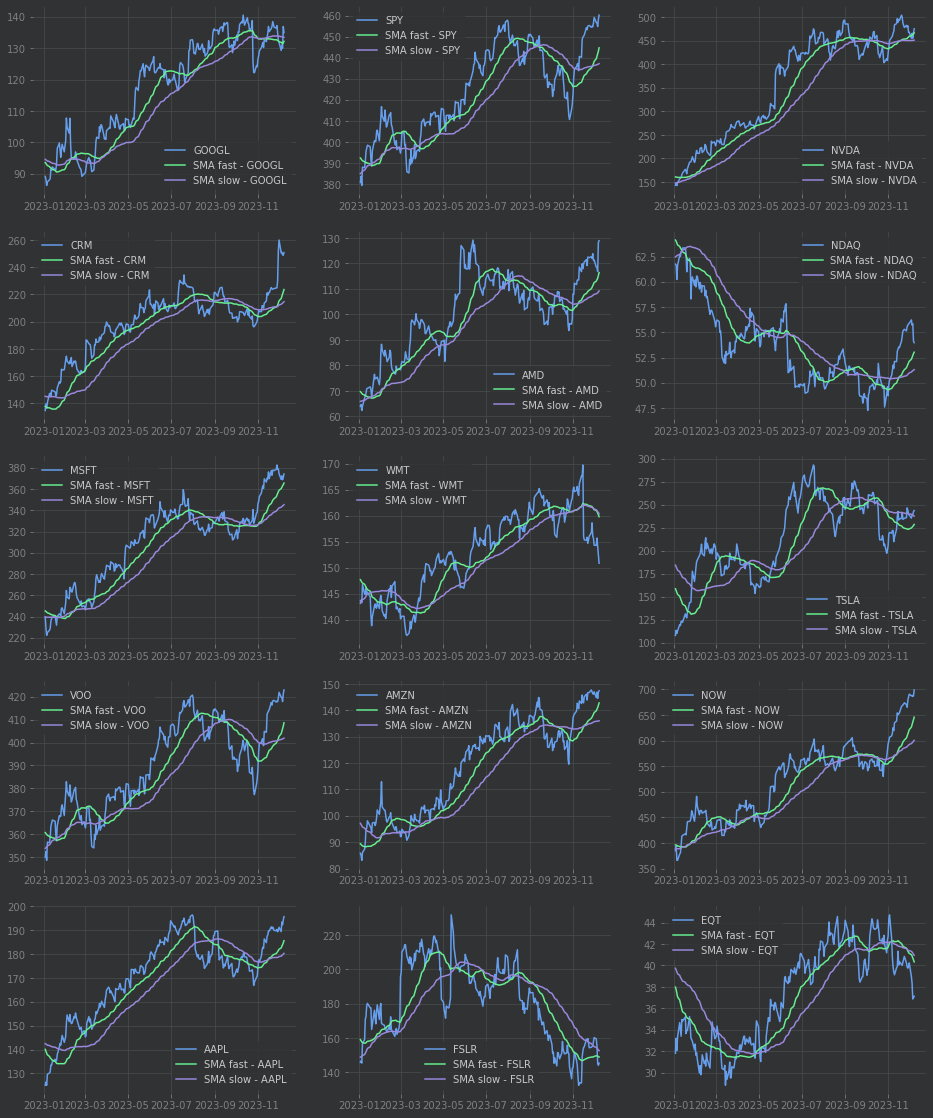

In [22]:
año = "2023"
plt.subplots(5, 3, figsize = (16,20), squeeze=True)

for indice, simbolo in enumerate(empresas):
    df = SMA_strategy(simbolo)
    plt.subplot(5,3,indice+1)
    plt.plot(df["close"].loc[año], label=simbolo)
    plt.plot(df["SMA fast"].loc[año], label="SMA fast - "+simbolo)
    plt.plot(df["SMA slow"].loc[año], label="SMA slow - "+simbolo)
    plt.legend()

plt.show()